
Anomalies Detected (Revenue Z-score > 2):



,order_id,user_id,order_date,revenue,cost,marketing_channel,is_refunded,revenue_zscore
4,5,105,2025-01-05,500,300,Referral,0,2.379961


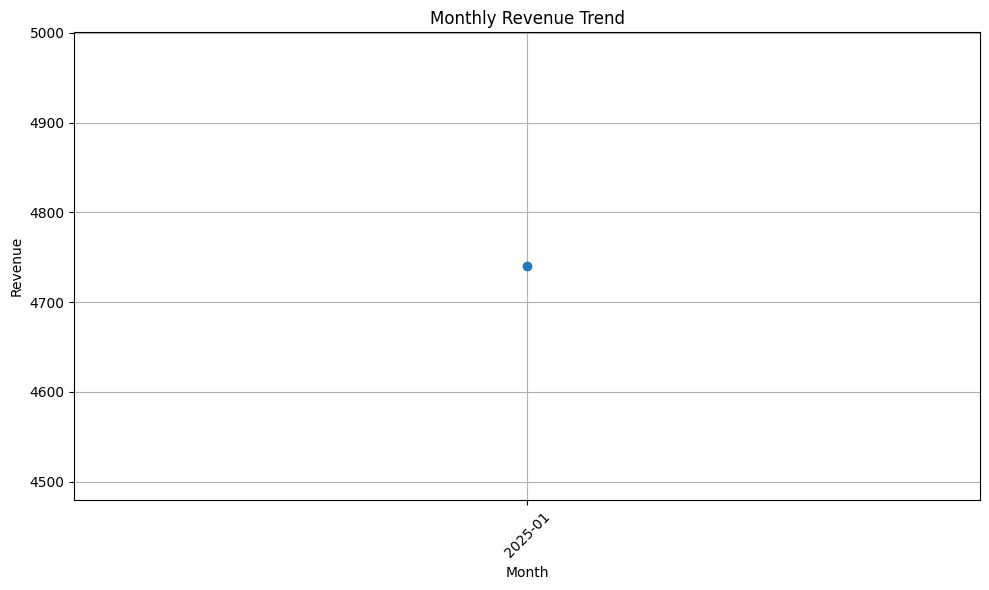

--- Business Health KPIs ---
Total Revenue: $4740.00
Total Orders: 20
Average Order Value (AOV): $237.00
Refund Rate: 25.00%
Customer Acquisition Cost (CAC): $192.67
Customer Lifetime Value (CLV): $316.00
Conversion Rate: 1.33


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------
# 1. Load Sample Data
# ------------------------------
# Example schema:
# order_id | user_id | order_date | revenue | cost | marketing_channel | is_refunded

data = {
    "order_id": range(1, 21),
    "user_id": [101,102,103,104,105,106,107,108,109,110,
                101,103,104,108,110,111,112,113,114,115],
    "order_date": pd.date_range("2025-01-01", periods=20, freq="D"),
    "revenue": [120, 200, 300, 150, 500, 250, 180, 400, 220, 330,
                130, 210, 310, 410, 90, 100, 150, 200, 230, 260],
    "cost": [60, 100, 180, 100, 300, 150, 100, 250, 120, 200,
             70, 120, 180, 300, 50, 70, 90, 120, 150, 180],
    "marketing_channel": ["Google","Facebook","Email","Google","Referral",
                          "Email","Facebook","Google","Email","Referral",
                          "Google","Facebook","Referral","Google","Email",
                          "Referral","Google","Facebook","Email","Referral"],
    "is_refunded": [0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1]
}

df = pd.DataFrame(data)

# ------------------------------
# 2. KPI Calculations
# ------------------------------

# Total Revenue
total_revenue = df["revenue"].sum()

# Total Orders
total_orders = df["order_id"].nunique()

# Average Order Value (AOV)
aov = df["revenue"].mean()

# Refund Rate
refund_rate = df["is_refunded"].mean() * 100

# Customer Acquisition Cost (CAC) → marketing spend proxy (simplified)
cac = df["cost"].sum() / df["user_id"].nunique()

# Customer Lifetime Value (CLV) → avg revenue per customer
clv = df.groupby("user_id")["revenue"].sum().mean()

# Conversion Rate (dummy: orders / unique users)
conversion_rate = total_orders / df["user_id"].nunique()

# ------------------------------
# 3. Anomaly Detection (Example: Using Z-score for Revenue)
# ------------------------------
# Anomaly Detection (Example: Using Z-score for Revenue)
df["revenue_zscore"] = np.abs((df["revenue"] - df["revenue"].mean()) / df["revenue"].std())

# Define a threshold for anomalies (e.g., Z-score > 2)
anomaly_threshold = 2

# Identify anomalies
anomalies = df[df["revenue_zscore"] > anomaly_threshold]

# Display anomalies
print("\nAnomalies Detected (Revenue Z-score > 2):\n")
display(anomalies)

# ------------------------------
# 4. Data Visualization (Example: Monthly Revenue Trend)
# ------------------------------

df["order_month"] = df["order_date"].dt.to_period("M")

monthly_revenue = df.groupby("order_month")["revenue"].sum().reset_index()
monthly_revenue["order_month"] = monthly_revenue["order_month"].astype(str)

plt.figure(figsize=(10, 6))
plt.plot(monthly_revenue["order_month"], monthly_revenue["revenue"], marker="o")
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# ------------------------------
# 5. Display KPIs
# ------------------------------

print("--- Business Health KPIs ---")
print(f"Total Revenue: ${total_revenue:.2f}")
print(f"Total Orders: {total_orders}")
print(f"Average Order Value (AOV): ${aov:.2f}")
print(f"Refund Rate: {refund_rate:.2f}%")
print(f"Customer Acquisition Cost (CAC): ${cac:.2f}")
print(f"Customer Lifetime Value (CLV): ${clv:.2f}")
print(f"Conversion Rate: {conversion_rate:.2f}")

In [19]:
# ------------------------------
# 1. Data Cleaning & Preprocessing
# ------------------------------

# Inspect raw data (check nulls, dtypes, duplicates)
print("--- Data Info ---")
df.info()
print("\n--- Missing Values ---")
print(df.isnull().sum())
print("\n--- Duplicates ---")
print(f"Number of duplicate rows: {df.duplicated().sum()}")

# Handle missing values (In this sample data, there are no missing values, so this step is for illustration)
# Example: df.fillna(value, inplace=True) or df.dropna(inplace=True)

# Convert date columns to proper datetime format (already done during data loading in this case)
# df["order_date"] = pd.to_datetime(df["order_date"]) # Uncomment if needed

# Standardize categorical fields (Example: converting to lowercase)
df["marketing_channel"] = df["marketing_channel"].str.lower()

print("\n--- Data after cleaning ---")
df.info()
print("\n--- Standardized Marketing Channels ---")
print(df["marketing_channel"].unique())

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_id           20 non-null     int64         
 1   user_id            20 non-null     int64         
 2   order_date         20 non-null     datetime64[ns]
 3   revenue            20 non-null     int64         
 4   cost               20 non-null     int64         
 5   marketing_channel  20 non-null     object        
 6   is_refunded        20 non-null     int64         
 7   revenue_zscore     20 non-null     float64       
 8   order_month        20 non-null     period[M]     
 9   order_week         20 non-null     period[W-SUN] 
dtypes: datetime64[ns](1), float64(1), int64(5), object(1), period[M](1), period[W-SUN](1)
memory usage: 1.7+ KB

--- Missing Values ---
order_id             0
user_id              0
order_date           0
revenue      

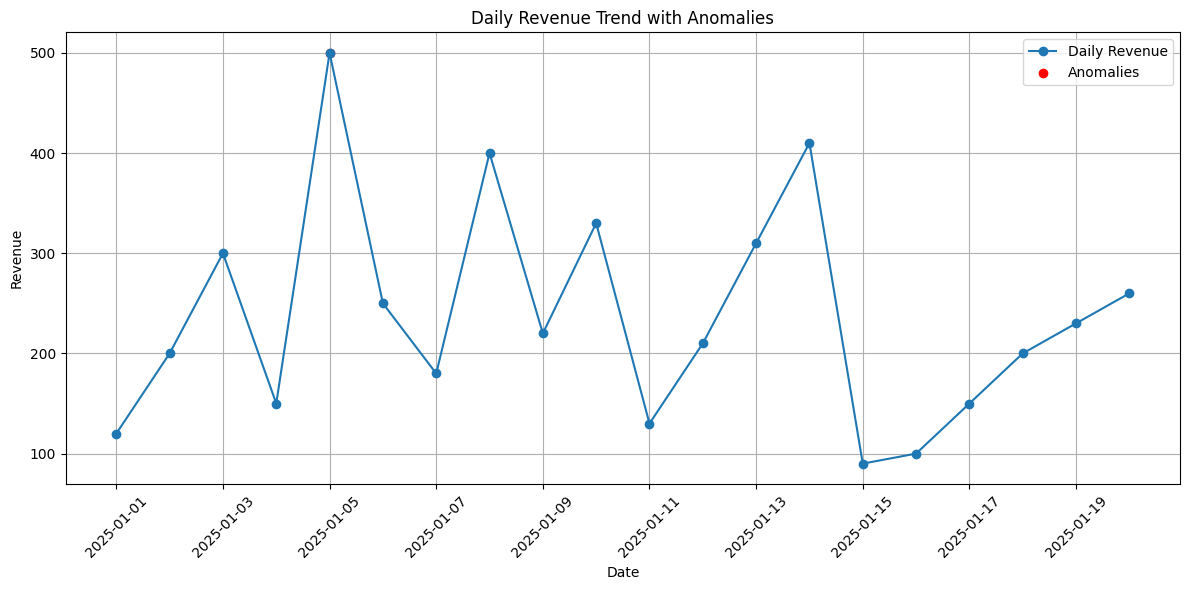

In [18]:
# Visualize Daily Sales Trend with Anomalies (matplotlib/seaborn)
daily_sales = df.groupby("order_date")["revenue"].sum().reset_index() # Recalculate daily_sales to ensure it's available

plt.figure(figsize=(12, 6))
plt.plot(daily_sales["order_date"], daily_sales["revenue"], marker="o", label="Daily Revenue")
plt.scatter(anomalies_daily["order_date"], anomalies_daily["revenue"], color="red", label="Anomalies")
plt.title("Daily Revenue Trend with Anomalies")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [17]:
# Detect anomalies in daily sales using mean ± std deviation
daily_sales = df.groupby("order_date")["revenue"].sum().reset_index()
mean_sales = daily_sales["revenue"].mean()
std_sales = daily_sales["revenue"].std()
anomaly_threshold_upper = mean_sales + 2 * std_sales
anomaly_threshold_lower = mean_sales - 2 * std_sales

anomalies_daily = daily_sales[(daily_sales["revenue"] > anomaly_threshold_upper) | (daily_sales["revenue"] < anomaly_threshold_lower)]

print("\nDaily Sales Anomalies (mean ± 2*std):\n")
display(anomalies_daily)


Daily Sales Anomalies (mean ± 2*std):



,order_date,revenue
4,2025-01-05,500


In [16]:
# Group data by time (daily/weekly/monthly) for trend analysis
# Daily trend
daily_trend = df.groupby("order_date")["revenue"].sum().reset_index()
print("\nDaily Revenue Trend:\n")
display(daily_trend)

# Weekly trend
df["order_week"] = df["order_date"].dt.to_period("W")
weekly_trend = df.groupby("order_week")["revenue"].sum().reset_index()
weekly_trend["order_week"] = weekly_trend["order_week"].astype(str)
print("\nWeekly Revenue Trend:\n")
display(weekly_trend)

# Monthly trend (already calculated in the previous cell, but showing again for completeness)
# df["order_month"] = df["order_date"].dt.to_period("M") # This line is already in the previous cell
monthly_trend = df.groupby("order_month")["revenue"].sum().reset_index()
monthly_trend["order_month"] = monthly_trend["order_month"].astype(str)
print("\nMonthly Revenue Trend:\n")
display(monthly_trend)


Daily Revenue Trend:



,order_date,revenue
0,2025-01-01,120
1,2025-01-02,200
2,2025-01-03,300
3,2025-01-04,150
4,2025-01-05,500
5,2025-01-06,250
6,2025-01-07,180
7,2025-01-08,400
8,2025-01-09,220
9,2025-01-10,330



Weekly Revenue Trend:



,order_week,revenue
0,2024-12-30/2025-01-05,1270
1,2025-01-06/2025-01-12,1720
2,2025-01-13/2025-01-19,1490
3,2025-01-20/2025-01-26,260



Monthly Revenue Trend:



,order_month,revenue
0,2025-01,4740


In [15]:
# Build Conversion Rate metric (Orders ÷ Unique Users)
conversion_rate = df["order_id"].nunique() / df["user_id"].nunique()
print(f"Conversion Rate: {conversion_rate:.2f}")

Conversion Rate: 1.33


In [14]:
# Compute Customer Acquisition Cost (CAC)
# Assuming 'cost' is a proxy for marketing spend and user_id represents unique customers
cac = df["cost"].sum() / df["user_id"].nunique()
print(f"Customer Acquisition Cost (CAC): ${cac:.2f}")

Customer Acquisition Cost (CAC): $192.67
